In [1]:
# Libraries for data preparation & visualization
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# pip install scikit-surprise
# Importing libraries for model building & evaluation
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise import accuracy

In [2]:
def load_data(filename):
    df=pd.read_csv(f'{filename}.csv',sep=';',on_bad_lines="skip",encoding='latin-1')
    return df


book=load_data("BX-Books")
user=load_data("BX-Users")
rating=load_data("BX-Book-Ratings")


In [3]:
rating.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [4]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [5]:
rating.duplicated().sum()

0

In [6]:
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [7]:
import kaleido #required
kaleido.__version__ #0.2.1


'0.2.1'

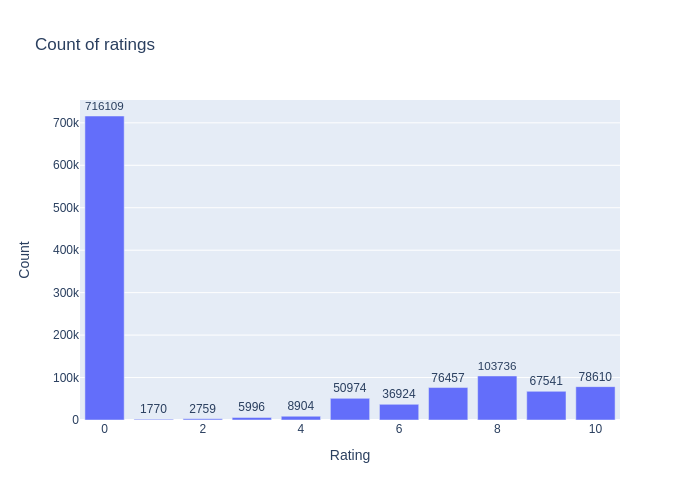

In [8]:
rating_types = rating['Book-Rating'].value_counts()
x,y   = rating_types.index, rating_types.values
data  = go.Bar(x=x,y=y, text=y, textposition="outside")
Layout=go.Layout(title="Count of ratings",xaxis={'title':'Rating'},yaxis={'title':'Count'})
go.Figure(data,Layout)

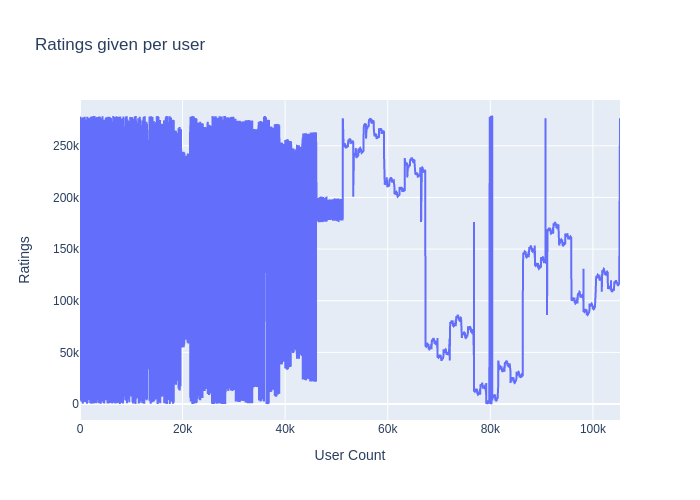

In [14]:
rating_users = rating['User-ID'].value_counts().reset_index().\
               rename({'Index':'User-ID','User-ID':'Rating'}, axis=1)

data  = go.Scatter(x = rating_users.index, y= rating_users['Rating'])
Layout= go.Layout(title="Ratings given per user",xaxis={'title':'User Count'}, yaxis={'title':'Ratings'})
go.Figure(data, Layout)                            

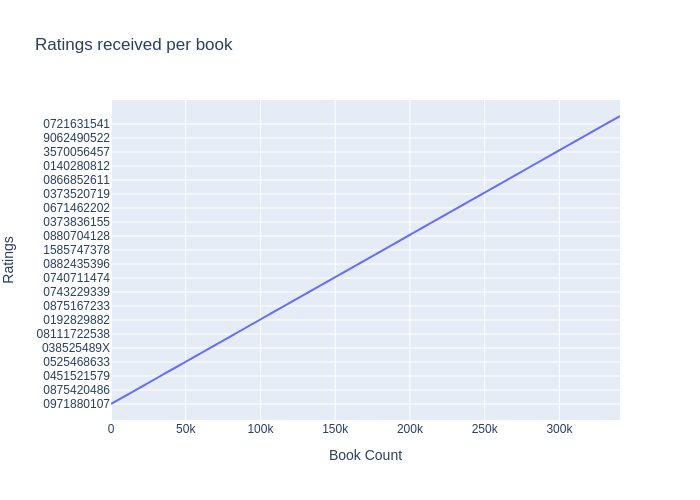

In [15]:
# Let's visualize ratings received by books

rating_books = rating['ISBN'].value_counts().reset_index().\
               rename({'Index':'ISBN','ISBN':'Rating'}, axis=1)

data  = go.Scatter(x = rating_books.index, y= rating_books['Rating'])
Layout= go.Layout(title="Ratings received per book",xaxis={'title':'Book Count'}, yaxis={'title':'Ratings'})
go.Figure(data, Layout) 

In [16]:
rating_books = rating['ISBN'].value_counts().reset_index().\
               rename({'Index':'ISBN','ISBN':'Rating'}, axis=1)

In [21]:
# For the recommendation system, it is prefered to have the book titles rather than ISBN for easier interpretation

rating = rating.merge(book, on="ISBN")[['User-ID','Book-Title','Book-Rating']] # merging with the book dataframe
rating

,User-ID,Book-Title,Book-Rating
0,276725,Flesh Tones: A Novel,0
1,276726,Rites of Passage,5
2,276727,The Notebook,0
3,276729,Help!: Level 1,3
4,276729,The Amsterdam Connection : Level 4 (Cambridge ...,6
...,...,...,...
1031131,276704,Edgar Cayce on the Akashic Records: The Book o...,0
1031132,276704,Get Clark Smart : The Ultimate Guide for the S...,9
1031133,276706,Eight Weeks to Optimum Health: A Proven Progra...,0
1031134,276709,The Sherbrooke Bride (Bride Trilogy (Paperback)),10


In [22]:
print(f'Duplicate entries: {rating.duplicated().sum()}')

Duplicate entries: 3127


In [23]:
rating.drop_duplicates(inplace=True)
rating

,User-ID,Book-Title,Book-Rating
0,276725,Flesh Tones: A Novel,0
1,276726,Rites of Passage,5
2,276727,The Notebook,0
3,276729,Help!: Level 1,3
4,276729,The Amsterdam Connection : Level 4 (Cambridge ...,6
...,...,...,...
1031131,276704,Edgar Cayce on the Akashic Records: The Book o...,0
1031132,276704,Get Clark Smart : The Ultimate Guide for the S...,9
1031133,276706,Eight Weeks to Optimum Health: A Proven Progra...,0
1031134,276709,The Sherbrooke Bride (Bride Trilogy (Paperback)),10


In [24]:
list_of_distinct_users = list(rating['User-ID'].unique())

In [29]:
reader=Reader(rating_scale=(0,10))
data=Dataset.load_from_df(rating[['User-ID','Book-Title','Book-Rating']],reader)

raw_ratings=data.raw_ratings
import random
random.shuffle(raw_ratings)
thresold=int(len(raw_ratings)*0.8)

train_raw_ratings=raw_ratings[:thresold]
test_raw_ratings=raw_ratings[thresold:]


data.raw_ratings=train_raw_ratings
trainset=data.build_full_trainset()
testset=data.construct_testset(test_raw_ratings)

In [28]:
data.raw_ratings

[(276725, 'Flesh Tones: A Novel', 0.0, None),
 (276726, 'Rites of Passage', 5.0, None),
 (276727, 'The Notebook', 0.0, None),
 (276729, 'Help!: Level 1', 3.0, None),
 (276729,
  'The Amsterdam Connection : Level 4 (Cambridge English Readers)',
  6.0,
  None),
 (276733, 'Les Particules Elementaires', 0.0, None),
 (276744, 'A Painted House', 7.0, None),
 (276746, 'Lightning', 0.0, None),
 (276746, 'Manhattan Hunt Club', 0.0, None),
 (276746, 'Dark Paradise', 0.0, None),
 (276746, 'Night Sins', 0.0, None),
 (276746, 'At the Edge', 0.0, None),
 (276746, 'Make Them Cry', 0.0, None),
 (276747, 'Little Altars Everywhere', 9.0, None),
 (276747, 'How Stella Got Her Groove Back', 0.0, None),
 (276747, 'The Law of Love', 0.0, None),
 (276747, 'Waiting to Exhale', 9.0, None),
 (276747, 'Birdsong: A Novel of Love and War', 8.0, None),
 (276747, 'How to Deal With Difficult People', 7.0, None),
 (276747,
  'Change Your Job, Change Your Life: High Impact Strategies for Finding Great Jobs in the Decade

In [31]:
# Trying KNN (K-Nearest Neighbors) & SVD (Singluar Value decomposition) algorithms using default model parameters

models=[KNNBasic(),KNNWithMeans(),KNNWithZScore(),KNNBaseline(),SVD()] 
results = {}

for model in models:
    # perform 5 fold cross validation
    # evaluation metrics: mean absolute error & root mean square error
    CV_scores = cross_validate(model, data, measures=["MAE","RMSE"], cv=5, n_jobs=-1)  
    
    # storing the average score across the 5 fold cross validation for each model
    result = pd.DataFrame.from_dict(CV_scores).mean(axis=0).\
             rename({'test_mae':'MAE', 'test_rmse': 'RMSE'})
    results[str(model).split("algorithms.")[1].split("object ")[0]] = result

Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...
Computing the msd similarity matrix...


MemoryError: Unable to allocate 38.8 GiB for an array with shape (72180, 72180) and data type float64